In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
social_media_data = pd.read_csv('social_media_usage.csv')

# Check the first few rows of the dataset
print("First few rows of the dataset:")
print(social_media_data.head())
print("\nMissing values in each column:")
print(social_media_data.isnull().sum())

social_media_data.fillna(0, inplace=True)



First few rows of the dataset:
  User_ID        App  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
0     U_1  Pinterest                  288             16             94   
1     U_2   Facebook                  192             14            117   
2     U_3  Instagram                  351             13            120   
3     U_4     TikTok                   21             20            117   
4     U_5   LinkedIn                  241             16              9   

   Follows_Per_Day  
0                0  
1               15  
2               48  
3                8  
4               21  

Missing values in each column:
User_ID                0
App                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64


In [7]:
social_media_data['Daily_Minutes_Spent'] = pd.to_numeric(social_media_data['Daily_Minutes_Spent'], errors='coerce')
social_media_data['Posts_Per_Day'] = pd.to_numeric(social_media_data['Posts_Per_Day'], errors='coerce')
social_media_data['Likes_Per_Day'] = pd.to_numeric(social_media_data['Likes_Per_Day'], errors='coerce')
social_media_data['Follows_Per_Day'] = pd.to_numeric(social_media_data['Follows_Per_Day'], errors='coerce')

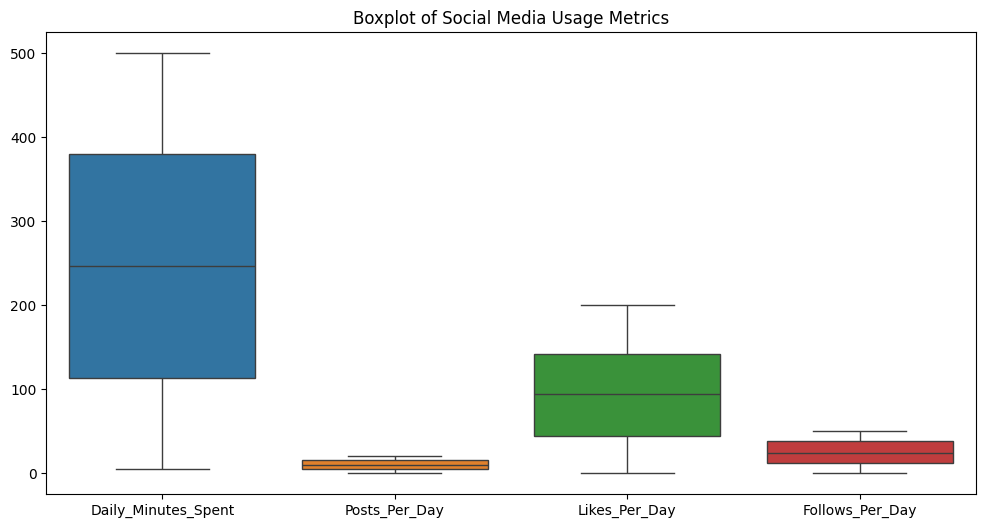

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=social_media_data[['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']])
plt.title('Boxplot of Social Media Usage Metrics')
plt.show()

In [9]:
social_media_data['Daily_Minutes_Spent'] = social_media_data['Daily_Minutes_Spent'].clip(upper=500)  # Cap at 500 mins


In [10]:
social_media_data['Engagement_Score'] = (social_media_data['Posts_Per_Day'] +
                                          social_media_data['Likes_Per_Day'] +
                                          social_media_data['Follows_Per_Day'])

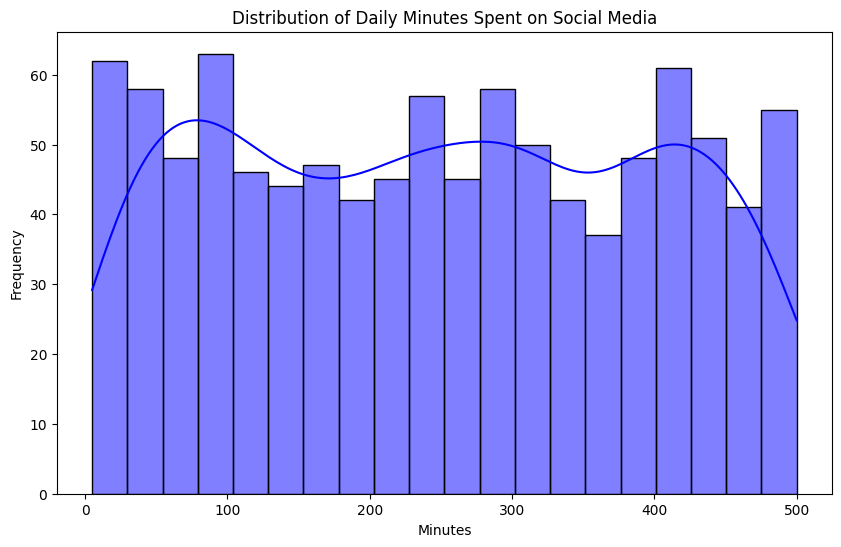

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(social_media_data['Daily_Minutes_Spent'], kde=True, color='blue', bins=20)
plt.title('Distribution of Daily Minutes Spent on Social Media')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

In [12]:
print("\nChecking for duplicate entries:")
duplicates = social_media_data[social_media_data.duplicated()]
if not duplicates.empty:
    print(f"Found {len(duplicates)} duplicate rows. Removing them.")
    social_media_data.drop_duplicates(inplace=True)


Checking for duplicate entries:


In [13]:
print("\nSummary of the cleaned dataset:")
print(social_media_data.describe())


Summary of the cleaned dataset:
       Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  Follows_Per_Day  \
count          1000.000000    1000.000000    1000.000000      1000.000000   
mean            247.368000      10.269000      94.682000        24.698000   
std             146.371921       6.121774      57.560943        14.842948   
min               5.000000       0.000000       0.000000         0.000000   
25%             112.750000       5.000000      44.750000        12.000000   
50%             246.000000      10.000000      94.000000        24.000000   
75%             380.500000      16.000000     142.000000        38.000000   
max             500.000000      20.000000     200.000000        50.000000   

       Engagement_Score  
count       1000.000000  
mean         129.649000  
std           59.635444  
min           13.000000  
25%           78.000000  
50%          128.000000  
75%          178.000000  
max          267.000000  


In [14]:
social_media_data.to_csv('cleaned_social_media_usage.csv', index=False)